In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
true_label =[1, 1, 1, 0, 0, 1, 0]
pred_label = [1, 1, 1, 1, 1, 1, 0]

In [3]:
accuracy_score(true_label, pred_label)

0.7142857142857143

In [4]:
confusion_matrix(true_label, pred_label)

array([[1, 2],
       [0, 4]], dtype=int64)

### First model

In [5]:
df = pd.read_csv("data/22.6 vehicles_dataset_prepared.csv")
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,x0_diesel,x0_electric,x0_gas,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,1.0,0.0,0.0,...,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0.0,0.0,0.0,...,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0.0,0.0,1.0,...,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0.0,0.0,1.0,...,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0.0,0.0,0.0,...,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


In [6]:
df.shape

(9619, 1463)

In [7]:
df.price_category.value_counts()

price_category
medium    3220
low       3200
high      3199
Name: count, dtype: int64

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

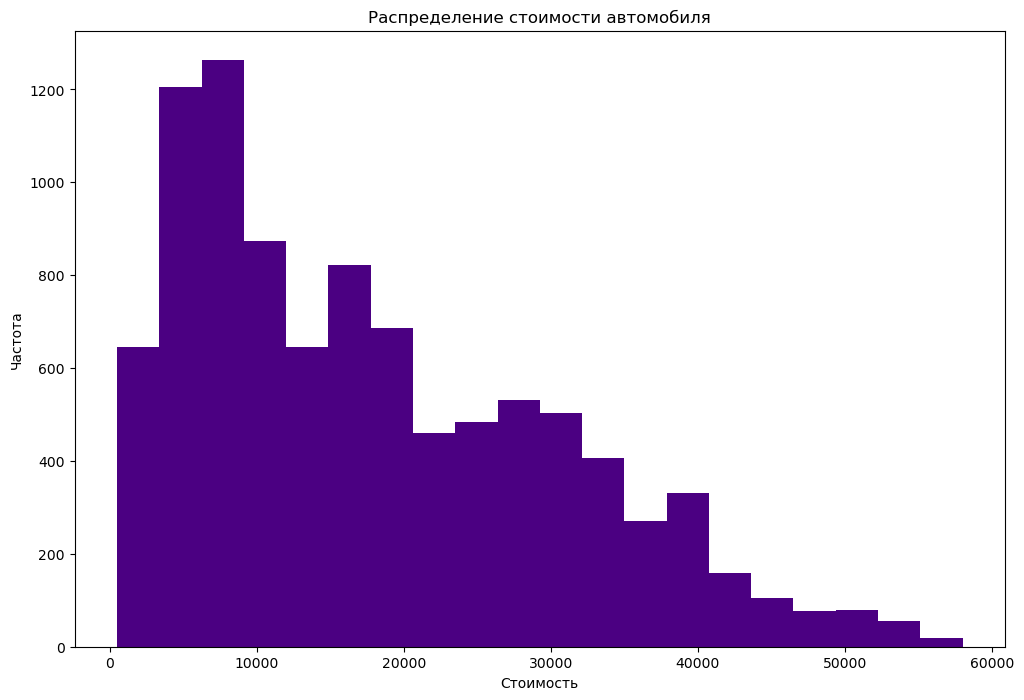

In [8]:
plt.figure(figsize=(12, 8))

#plt.hist(df.price, color="indigo",bins=1+int(np.log(len(df.price))))
#plt.hist(df.price, color="indigo",bins=1+int(np.log(len(df.price))+1))
plt.hist(df.price, color="indigo",bins=20)

plt.xlabel("Стоимость")
plt.ylabel("Частота")
plt.title("Распределение стоимости автомобиля")


In [9]:
df_prepared = df.copy()

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
x = df_prepared.drop(['price_category'], axis=1) # фичи
y = df_prepared["price_category"] # целевая переменнная


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
x_train.shape, x_test.shape

((6733, 1462), (2886, 1462))

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)


In [17]:
predicted_train

array(['high', 'high', 'high', ..., 'medium', 'high', 'medium'],
      dtype=object)

In [18]:
predicted_test

array(['high', 'medium', 'low', ..., 'low', 'medium', 'low'], dtype=object)

In [19]:
print(accuracy_score(y_train, predicted_train)) # Это нереально
print(accuracy_score(y_test, predicted_test))


1.0
0.9996534996534997


In [20]:
# 'odometer/price_std' in df_prepared.columns
df_prepared = df_prepared.drop(['price', 'odometer/price_std'], axis=1)

In [21]:
x = df_prepared.drop(["price_category"], axis=1)
y = df_prepared['price_category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [22]:
x_train.shape, y_train.shape,  x_test.shape, y_test.shape

((6733, 1460), (6733,), (2886, 1460), (2886,))

In [23]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [24]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)


In [25]:
print(accuracy_score(predicted_train, y_train))
print(accuracy_score(predicted_test, y_test))


1.0
0.6715176715176715


In [26]:
clf.feature_importances_ 

array([0.03153366, 0.00041354, 0.00361083, ..., 0.00119892, 0.01597274,
       0.22722113])

In [27]:
f_imp_list = list(zip(x_train.columns, clf.feature_importances_ ))

sorted(f_imp_list, key=lambda x: x[1], reverse=True)

[('diff_years_std', 0.2272211304381066),
 ('model_len_std', 0.0758982691557044),
 ('std_scaled_odometer', 0.07502005093368261),
 ('desc_len_std', 0.07022837923446816),
 ('lat_std', 0.046171766290171196),
 ('long_std', 0.037379828200389154),
 ('x0_diesel', 0.033432173704991304),
 ('id', 0.03153365862036432),
 ('year_std', 0.01606357757338929),
 ('dayofweek_std', 0.01597274483398868),
 ('manufacturer_kia', 0.010213227233613708),
 ('short_model_wrangler', 0.008817218605738029),
 ('manufacturer_ram', 0.008689871774991722),
 ('short_model_f-150', 0.0068839503856525696),
 ('model_word_count_std', 0.0061427020798735105),
 ('short_model_silverado', 0.005888341612947565),
 ('manufacturer_hyundai', 0.005663759938057567),
 ('manufacturer_gmc', 0.0051002461993122205),
 ('short_model_Scion', 0.004865746378858322),
 ('short_model_tacoma', 0.004739411290887028),
 ('manufacturer_volkswagen', 0.004688153727143015),
 ('manufacturer_mercedes-benz', 0.004590363002455255),
 ('model_in_desc_std', 0.00411196

In [28]:
clf.get_params() 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [31]:
_list = [x_train, x_test, y_train, y_test]
for i in _list:
    print(i.shape)

(6733, 1460)
(2886, 1460)
(6733,)
(2886,)


In [32]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)        

RandomForestClassifier()

In [33]:
predicted_rf_train = rf_clf.predict(x_train)
predicted_rf_test = rf_clf.predict(x_test)


In [34]:
print(accuracy_score(y_train, predicted_rf_train))
print(accuracy_score(y_test, predicted_rf_test))


1.0
0.7560637560637561
